In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# import PyNIO as Nio   #  deprecated
import pandas as pd
import glob
from copy import deepcopy
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
# from fitLRM_cy4 import *

from useful_func_cy import * 
# from calc_Radiation_LRM_1 import *
# from calc_Radiation_LRM_2 import *
# from calc_Radiation_OBS_2 import *

# This file is for making a function to calculate the state-variant sensitivities in "abrupt4xCO2" experiments of 50 GCMs 

In [2]:
# Model list (Global Climate Model);

exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


In [3]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, CNRMCM61HR, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]   # current # 30 (no.19) + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'CNRMCM61HR', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']

deck3 = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
         FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
          GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]

deck3_nas = ['CanESM5', 'E3SM10', 'CESM2FV2', 'CESM2', 'CNRMCM61', 'CESM2WACCMFV2', 'CNRMESM21', 'NESM3', 'IPSLCM6ALR', 'CESM2WACCM', 'MIROCESM', 'TaiESM1', 'ECEarth3Veg', 'CNRMCM61HR', 'ECEarth3', 
         'FGOALSs2', 'IPSLCM5ALR', 'CSIRO_Mk360', 'BNUESM', 'GFDLCM3', 'GFDLCM4', 'SAM0', 'CanESM2', 'MPIESMLR', 'CMCCCM2SR5', 'MPIESMMR', 'FGOALSg2', 'BCCESM1', 'CNRMCM5', 'AWICM11MR', 'MRIESM20', 
          'GISSE21H', 'MPIESM12LR', 'CCSM4', 'NorESM1M', 'FGOALSg3', 'bcccsm11', 'MIROC5', 'GISSE21G', 'MIROCES2L', 'MRICGCM3', 'MIROC6', 'NorESM2MM', 'GFDLESM2M', 'GFDLESM2G', 'GISSE22G', 'GISSE21H', 'CAMSCSM1', 'GISSE2R', 'INM_CM48']


# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/Explore_1/'

In [22]:
# temporary for testing:

model_data = CESM2

# def calc_statedependent_metric(THRESHOLD_sst, THRESHOLD_sub, **model_data):

# get variable data
if model_data['cmip'] == 'cmip6':

    inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

elif model_data['cmip'] == 'cmip5':

    inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
else:
    print('not cmip6 & cmip5 data.')



CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/pr_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable pr   abrupt-4xCO2


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/read_hs_file.py:190: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data = f.variables[varnm][ind]


type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
retrieve time:  [1, 1, 1] [150, 12, 31]
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ts_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ts   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ta_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ta   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1188, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/clwvi_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc']
 Variable clwvi   piControl
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1188, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/tas_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc']
 Varia

In [25]:
def calc_LRM_split15yrs(THRESHOLD_sst, THRESHOLD_sub, **model_data):
    
    # get variable data
    if model_data['cmip'] == 'cmip6':

        inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

    elif model_data['cmip'] == 'cmip5':

        inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
    else:
        print('not cmip6 & cmip5 data.')


    #..get the shapes of monthly data

    shape_lat = len(inputVar_pi['lat'])
    shape_lon = len(inputVar_pi['lon'])
    shape_time_pi = len(inputVar_pi['times'])
    shape_time_abr = len(inputVar_abr['times'])
    #print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


    #..choose lat 40 -85 °S as the Southern-Ocean Regions
    lons = inputVar_pi['lon'] *1.
    lats = inputVar_pi['lat'][:] *1.

    levels = array(inputVar_abr['pres'])
    times_abr = inputVar_abr['times'] *1.
    times_pi = inputVar_pi['times'] *1.

    lati0 = -40.
    latsi0= min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
    lati1 = -85.
    latsi1= min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
    print('lat index for 40.s; 85.s', latsi0, latsi1)
    shape_latSO = (latsi0+1) - latsi1
    #print(shape_latSO)


    #..abrupt-4xCO2 Variables: LWP, tas(gmt), SST, (MC), p-e; SW radiation metrics
    LWP_abr = array(inputVar_abr['clwvi']) - array(inputVar_abr['clivi'])   #..units in kg m^-2

    gmt_abr = array(inputVar_abr['tas'])

    SST_abr = array(inputVar_abr['sfc_T'])

    Precip_abr = array(inputVar_abr['P']) * (24.*60.*60.)   #.. Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
    print('abr4x average Pr(mm/ day): ', nanmean(Precip_abr))   #.. IPSL/abr2.80..  CNRM ESM2 1/abr 2.69.. CESM2/abr 2.74..
    lh_vaporization_abr = (2.501 - (2.361 * 10**-3) * (SST_abr - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
    # Eva_abr2 = array(inputVar_abr['E']) * (24. * 60 * 60)
    Eva_abr1 = array(inputVar_abr['E']) / lh_vaporization_abr * (24. * 60 * 60)  #.. Evaporation, mm day^-1
    print('abr4x average Evapor(mm/ day): ', nanmean(Eva_abr1))         #.. IPSL/abr2.50..  CNRM ESM2 1/abr 2.43.. CESM2/abr 2.43..
    MC_abr = Precip_abr - Eva_abr1   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1

    Twp_abr = array(inputVar_abr['clwvi'])
    Iwp_abr = array(inputVar_abr['clivi'])

    # SW radiation metrics
    Rsdt_abr = array(inputVar_abr['rsdt'])
    Rsut_abr = array(inputVar_abr['rsut'])
    Rsutcs_abr = array(inputVar_abr['rsutcs'])
    print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:, latsi1:latsi0 +1,:]))
    print("shape of data in 'abrupt-4XCO2' exp:", Eva_abr1.shape, 'abr4x mean-gmt(K): ', nanmean(gmt_abr))

    # albedo, albedo_clear sky, albedo_cre: all-sky - clear-sky
    Albedo_abr = Rsut_abr / Rsdt_abr
    Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
    Alpha_cre_abr = Albedo_abr - Albedo_cs_abr

    if np.min(LWP_abr) < -1e-3:
        LWP_abr = Twp_abr
        print('clwvi mislabeled')

    #..piControl Variables: LWP, tas(gmt), SST, (MC), p-e ; SW radiation metrics (rsdt, rsut, rsutcs)
    LWP = array(inputVar_pi['clwvi']) - array(inputVar_pi['clivi'])   #..units in kg m^-2

    gmt = array(inputVar_pi['tas'])
    SST = array(inputVar_pi['sfc_T'])

    Precip = array(inputVar_pi['P'])* (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
    print('pi-C average Pr(mm/ day): ', nanmean(Precip))   #.. IPSL/piC 2.43..CNRM/piC 2.40.. CESM2/PIc 2.39
    lh_vaporization = (2.501 - (2.361 * 10**-3) * (SST - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
    Eva1 = array(inputVar_pi['E']) / lh_vaporization * (24. * 60 * 60)
    # Eva2 = array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1

    print('pi-C average Evapor(mm/day): ', nanmean(Eva1))   #.. IPSL/piC  2.21..CNRM/piC 2.20.. CESM2/PIc 2.17..
    MC = Precip - Eva1   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1

    Twp = array(inputVar_pi['clwvi'])
    Iwp = array(inputVar_pi['clivi'])


    # SW radiation metrics
    Rsdt_pi = array(inputVar_pi['rsdt'])
    Rsut_pi = array(inputVar_pi['rsut'])
    Rsutcs_pi = array(inputVar_pi['rsutcs'])
    print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
    , nanmean(Rsut_pi[:, latsi1:latsi0 +1,:]))
    print("shape of data in 'piControl' data: ", Eva1.shape, 'pi-C mean-gmt(K): ', nanmean(gmt))

    # albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
    Albedo_pi = Rsut_pi / Rsdt_pi
    Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
    Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

    if np.min(LWP) < -1e-3:
        LWP = Twp
        print('clwvi mislabeled')

    #..abrupt-4xCO2
    # Lower Tropospheric Stability (LTS):
    k = 0.286

    theta_700_abr = array(inputVar_abr['T_700']) * (100000./70000.)**k
    theta_skin_abr = array(inputVar_abr['sfc_T']) * (100000./array(inputVar_abr['sfc_P']))**k 
    LTS_m_abr = theta_700_abr - theta_skin_abr

    #..Subtract the outliers in T_700 and LTS_m, 'nan' comes from missing T_700 data
    LTS_e_abr = ma.masked_where(theta_700_abr >= 500, LTS_m_abr)

    # Meteorology Subsidence at 500 hPa, units in Pa s^-1:
    Subsidence_abr = array(inputVar_abr['sub'])

    #.. piControl
    # Lower Tropospheric Stability (LTS):
    theta_700 = array(inputVar_pi['T_700']) * (100000./70000.)**k
    theta_skin = array(inputVar_pi['sfc_T']) * (100000./array(inputVar_pi['sfc_P']))**k
    LTS_m = theta_700 - theta_skin

    #..Subtract the outliers in T_700 and LTS_m 
    LTS_e = ma.masked_where(theta_700 >= 500, LTS_m)

    #..Meteological Subsidence  at 500 hPa, units in Pa s^-1:
    Subsidence = array(inputVar_pi['sub'])

    # define Dictionary to store: CCFs(4), gmt, other variables :
    dict0_PI_var = {'gmt': gmt, 'LWP': LWP, 'TWP': Twp, 'IWP': Iwp, 'SST': SST, 'p_e': MC, 'LTS': LTS_m, 'SUB': Subsidence, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo': Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

    dict0_abr_var = {'gmt': gmt_abr, 'LWP': LWP_abr, 'TWP': Twp_abr, 'IWP': Iwp_abr, 'SST': SST_abr, 'p_e': MC_abr, 'LTS': LTS_m_abr ,'SUB': Subsidence_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}



    # get the annual mean, Southern-Ocean region arrays

    datavar_nas = ['LWP', 'TWP', 'IWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre', 'SST', 'p_e', 'LTS', 'SUB']  #..13 varisables except gmt (lon dimension diff)


    shape_yr_pi = shape_time_pi//12
    shape_yr_abr = shape_time_abr//12

    print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[0,:][1])

    dict1_abr_yr = get_annual_dict(dict0_abr_var, datavar_nas, times_abr, label = 'mon')
    dict1_PI_yr = get_annual_dict(dict0_PI_var, datavar_nas, times_pi, label = 'mon')

    for a in range(len(datavar_nas)):

        dict1_abr_yr[datavar_nas[a]+'_yr_so'] = dict1_abr_yr[datavar_nas[a]][:, latsi1:latsi0 +1,:]
        dict1_PI_yr[datavar_nas[a]+'_yr_so'] = dict1_PI_yr[datavar_nas[a]][:, latsi1:latsi0 +1,:]

    # gmt
    dict1_abr_yr['gmt_yr'] = get_annual_metric(dict0_abr_var['gmt'], times_abr, label = 'mon')
    dict1_PI_yr['gmt_yr'] = get_annual_metric(dict0_PI_var['gmt'], times_pi, label = 'mon')
    
    
    # Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
    #..set area-mean range and define function
    s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
    x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
    y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9


    # Annual variables in bin box:

    lat_array = lats[latsi1:latsi0+1] *1.
    lon_array = lons *1.
    lat_array1 = lats *1.

    dict1_PI_var = {}   #..add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata
    dict1_abr_var = {}   #..add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata

    for b in range(len(datavar_nas)):

        dict1_abr_yr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_abr_yr[datavar_nas[b]+'_yr_so'], lat_array, lon_array)
        dict1_PI_yr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_PI_yr[datavar_nas[b]+'_yr_so'], lat_array, lon_array)

    print(dict1_abr_yr['SST_yr_bin'].shape)

    dict1_abr_yr['gmt_yr_bin'] = binned_cyGlobal5(dict1_abr_yr['gmt_yr'], lat_array1, lon_array)
    dict1_PI_yr['gmt_yr_bin'] = binned_cyGlobal5(dict1_PI_yr['gmt_yr'], lat_array1, lon_array)
    print("gmt_yr_bin")

    dict1_PI_var['dict1_yr_bin_PI'] = dict1_PI_yr
    dict1_abr_var['dict1_yr_bin_abr'] = dict1_abr_yr


    # Monthly variables:
    dict1_PI_mon = {}
    dict1_abr_mon = {}

    for c in range(len(datavar_nas)):
        dict1_abr_mon[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_abr_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)
        dict1_PI_mon[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_PI_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)

    print(dict1_abr_mon['LTS_mon_bin'].shape)

    dict1_abr_mon['gmt_mon_bin'] = binned_cyGlobal5(dict0_abr_var['gmt'][0:,:,:], lat_array1, lon_array)
    dict1_PI_mon['gmt_mon_bin'] = binned_cyGlobal5(dict0_PI_var['gmt'][0:,:,:], lat_array1, lon_array)
    print("gmt_mon_bin")

    dict1_PI_var['dict1_mon_bin_PI'] = dict1_PI_mon
    dict1_abr_var['dict1_mon_bin_abr'] = dict1_abr_mon


    # input the shapes of year and month of pi&abr exper into the raw data dictionaries:
    dict1_abr_var['shape_yr'] = shape_yr_abr
    dict1_PI_var['shape_yr'] = shape_yr_pi

    dict1_abr_var['shape_mon'] = shape_time_abr
    dict1_PI_var['shape_mon'] = shape_time_pi

    # Output a dict for processing function in 'calc_LRM_metrics', stored the data dicts for PI and abr, with the model name_dict
    C_dict = {'dict1_PI_var': dict1_PI_var, 'dict1_abr_var': dict1_abr_var, 'model_data': model_data}  #..revised on Oct 7th, 2022.

    D_dict = deepcopy(C_dict)   # 'notice for the difference between shallow copy (object.copy()) and deep copy(copy.deepcopy(object))'
    # B_dict = deepcopy(C_dict)

    ###..Put data into 'fitLRM' FUNCTION to get predicted LWP splitted by 'Tr_sst'/'Tr_sub' infos_models:

    TR_sst = THRESHOLD_sst   ###.. threshold skin T
    TR_sub = THRESHOLD_sub   ###.. threshold of 500 mb Subsidence
    WD = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
    
    Coef_dict1 = fitLRM1_splitperiod(C_dict = D_dict, TR_sst=TR_sst, s_range=s_range, y_range=y_range, x_range=x_range, lats=lats, lons=lons)
    # rawdata_dict3 = p4plot1(s_range=s_range, y_range=y_range, x_range=x_range, Mean_training = rawdata_dict1['Mean_training'], Stdev_training = rawdata_dict1['Stdev_training'], shape_yr_pi=shape_yr_pi, shape_yr_abr=shape_yr_abr, rawdata_dict=rawdata_dict1)
    print(Coef_dict1)
    
    return Coef_dict1

In [24]:
def fitLRM1_splitperiod(C_dict, TR_sst, s_range, y_range, x_range, lats, lons):
    # 'C_dict' is the raw data dict, 'TR_sst' is the pre-defined skin_Temperature Threshold to distinguish two multi-linear regression models
    # 's_range , 'y_range', 'x_range' used to do area mean
    
    # 'Result_dict' is the dictionary for storing the piControl coef and the 15-yr splitted coefs in abrupt4xCO2 exp:
    Result_dict = {}
    
    # read data:
    dict0_abr_var = C_dict['dict1_abr_var']
    dict0_PI_var = C_dict['dict1_PI_var']
    #print(dict0_PI_var['times'])

    model = C_dict['model_data']   #.. type in dict
    datavar_nas = ['LWP', 'TWP', 'IWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'SST', 'p_e', 'LTS', 'SUB'] #..12 varisables except for gmt
    
    # load annual mean bin data:
    dict1_yr_bin_PI = dict0_PI_var['dict1_yr_bin_PI']
    dict1_yr_bin_abr = dict0_abr_var['dict1_yr_bin_abr']
    #print(dict1_yr_bin_PI['LWP_yr_bin'].shape)
    
    # load monthly bin data:
    dict1_mon_bin_PI = dict0_PI_var['dict1_mon_bin_PI']
    dict1_mon_bin_abr = dict0_abr_var['dict1_mon_bin_abr']
    
    # load data shape:
    shape_yr_PI = dict0_PI_var['shape_yr']
    shape_yr_abr = dict0_abr_var['shape_yr']
    shape_mon_PI = dict0_PI_var['shape_mon']
    shape_mon_abr = dict0_abr_var['shape_mon']
    

    # for the entire 99 years period of piControl exp, calc the LRM coefficients and save:
    dict2_predi_fla_PI = {}
    dict2_predi_ano_PI = {}  # need climatological values of variables
    dict2_predi_nor_PI = {}  # standardized anomalies of variables
    
    dict2_predi = {}
    #.. Flatten binned array /Standardized data ARRAY :
    for a in range(len(datavar_nas)):
        
        dict2_predi_fla_PI[datavar_nas[a]] = dict1_mon_bin_PI[datavar_nas[a]+'_mon_bin'].flatten()
        # anomalies in the raw units:
        # 'dict2_predi' saves the reference-period (piControl) mean for data variable
        dict2_predi[datavar_nas[a]] = deepcopy(dict1_mon_bin_PI[datavar_nas[a]+'_mon_bin'])
        dict2_predi_ano_PI[datavar_nas[a]] = dict2_predi_fla_PI[datavar_nas[a]] - nanmean(area_mean(dict2_predi[datavar_nas[a]], y_range, x_range))
        # normalized stardard deviation in unit of './std':
        dict2_predi_nor_PI[datavar_nas[a]] = dict2_predi_ano_PI[datavar_nas[a]] / nanstd(dict2_predi_fla_PI[datavar_nas[a]])  # divided by 1 standard deviation of monthly data
    
    # gmt
    GMT_pi_mon = area_mean(dict1_mon_bin_PI['gmt_mon_bin'], s_range, x_range)  #.. Monthly time series of global mean surface air temperature
    dict2_predi_fla_PI['gmt'] = GMT_pi_mon
    dict2_predi['gmt'] = deepcopy(dict2_predi_fla_PI['gmt'])
    dict2_predi_ano_PI['gmt'] = dict2_predi_fla_PI['gmt'] - nanmean(dict2_predi['gmt'])
    dict2_predi_nor_PI['gmt'] = dict2_predi_ano_PI['gmt'] / nanstd(dict1_mon_bin_PI['gmt_mon_bin'])
    
    metric_training = deepcopy(dict2_predi_ano_PI)
    #.. Training 1Regime LRM
    #.. piControl
    predict_dict_PI, _, _, coef_array_PI, shape_fla_training = rdlrm_1_training(metric_training, predictant='LWP')
    Result_dict["piControl"] = coef_array_PI
    
    
    # for every 15 years period in abrupt4xCO2 exp, calc the LRM coefficients and saved for data array:
    print(shape_yr_abr)
    for t in range(shape_yr_abr//15):
        print(t)
        # Splitwise according to each 15 years:
        dict2_predi_fla_abr = {}
        dict2_predi_ano_abr = {}
        dict2_predi_nor_abr = {}

        #.. Flatten binned array /Standardized data ARRAY :
        for b in range(len(datavar_nas)):

            dict2_predi_fla_abr[datavar_nas[b]] = dict1_mon_bin_abr[datavar_nas[b]+'_mon_bin'][12*15*t:12*15*(t+1),:,:].flatten()

            # anomalies in the raw units:
            # 'dict2_predi' saves the reference-period (piControl) mean for data variable
            dict2_predi_ano_abr[datavar_nas[b]] = dict2_predi_fla_abr[datavar_nas[b]] - nanmean(area_mean(dict2_predi[datavar_nas[b]], y_range,x_range))
            # normalized stardard deviation in unit of './std':
            dict2_predi_nor_abr[datavar_nas[b]] = dict2_predi_ano_abr[datavar_nas[b]] / nanstd(dict2_predi_fla_PI[datavar_nas[b]]) # divided by 1 standard deviation of monthly data
        
        GMT_abr_mon = area_mean(dict1_mon_bin_abr['gmt_mon_bin'][12*15*t:12*15*(t+1),:,:], s_range, x_range)  #.. Monthly time series of global mean surface air temperature
        dict2_predi_fla_abr['gmt'] = GMT_abr_mon
        dict2_predi_ano_abr['gmt'] = dict2_predi_fla_abr['gmt'] - nanmean(dict2_predi['gmt'])
        dict2_predi_nor_abr['gmt'] = dict2_predi_ano_abr['gmt'] / nanstd(dict1_mon_bin_PI['gmt_mon_bin'])
    
        metric_predict = deepcopy(dict2_predi_ano_abr)
        #.. Training 1Regime LRM
        #.. for every 15 years of abrupt4xCO2
        predict_dict_abr_split, _, _, coef_array_abr_split, shape_fla_abr_split = rdlrm_1_training(metric_predict, predictant='LWP')
        Result_dict["abrupt4xCO2"+"_"+str(t)] = coef_array_abr_split
    
    return Result_dict


In [7]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set area-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9
    

# Annual variables in bin box:

lat_array = lats[latsi1:latsi0+1] *1.
lon_array = lons *1.
lat_array1 = lats *1.

dict1_PI_var = {}   #..add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata
dict1_abr_var = {}   #..add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata

for b in range(len(datavar_nas)):

    dict1_abr_yr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_abr_yr[datavar_nas[b]+'_yr_so'], lat_array, lon_array)
    dict1_PI_yr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_PI_yr[datavar_nas[b]+'_yr_so'], lat_array, lon_array)

print(dict1_abr_yr['SST_yr_bin'].shape)

dict1_abr_yr['gmt_yr_bin'] = binned_cyGlobal5(dict1_abr_yr['gmt_yr'], lat_array1, lon_array)
dict1_PI_yr['gmt_yr_bin'] = binned_cyGlobal5(dict1_PI_yr['gmt_yr'], lat_array1, lon_array)
print("gmt_yr_bin")

dict1_PI_var['dict1_yr_bin_PI'] = dict1_PI_yr
dict1_abr_var['dict1_yr_bin_abr'] = dict1_abr_yr


# Monthly variables:
dict1_PI_mon = {}
dict1_abr_mon = {}

for c in range(len(datavar_nas)):
    dict1_abr_mon[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_abr_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)
    dict1_PI_mon[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_PI_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)

print(dict1_abr_mon['LTS_mon_bin'].shape)

dict1_abr_mon['gmt_mon_bin'] = binned_cyGlobal5(dict0_abr_var['gmt'][0:,:,:], lat_array1, lon_array)
dict1_PI_mon['gmt_mon_bin'] = binned_cyGlobal5(dict0_PI_var['gmt'][0:,:,:], lat_array1, lon_array)
print("gmt_mon_bin")

dict1_PI_var['dict1_mon_bin_PI'] = dict1_PI_mon
dict1_abr_var['dict1_mon_bin_abr'] = dict1_abr_mon


# input the shapes of year and month of pi&abr exper into the raw data dictionaries:
dict1_abr_var['shape_yr'] = shape_yr_abr
dict1_PI_var['shape_yr'] = shape_yr_pi

dict1_abr_var['shape_mon'] = shape_time_abr
dict1_PI_var['shape_mon'] = shape_time_pi

# Output a dict for processing function in 'calc_LRM_metrics', stored the data dicts for PI and abr, with the model name_dict
C_dict = {'dict1_PI_var': dict1_PI_var, 'dict1_abr_var': dict1_abr_var, 'model_data': model_data}  #..revised on Oct 7th, 2022.

D_dict = deepcopy(C_dict)   # 'notice for the difference between shallow copy (object.copy()) and deep copy(copy.deepcopy(object))'
# B_dict = deepcopy(C_dict)

###..Put data into 'fitLRM' FUNCTION to get predicted LWP splitted by 'Tr_sst'/'Tr_sub' infos_models:

TR_sst = 0.00   ###.. threshold skin T
# TR_sub = THRESHOLD_sub   ###.. threshold of 500 mb Subsidence
WD = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'


(150, 9, 72)
gmt_yr_bin
(1800, 9, 72)
gmt_mon_bin


In [29]:
WD = '/glade/scratch/chuyan/CMIP_output/CMIP_partition_RESULT/'

N_of_model = 2

folder = glob.glob(WD+ deck_nas2[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_June7_23_anomalies'+ '.npz')
# print(folder)
output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']

print("TR_min_abs(bias): " , TR_sst1, '  K ', TR_sub1 , ' Pa/s ')
print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')


calc_LRM_split15yrs(float(TR_sst2), float(TR_sub2), **deck2[N_of_model])

TR_min_abs(bias):  0.2841552826285252   K  0.01707090606822593  Pa/s 
TR_large_pi_R_2:  0.2841552826285252   K  0.01707090606822593  Pa/s 
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/pr_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable pr   abrupt-4xCO2


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/read_hs_file.py:190: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data = f.variables[varnm][ind]


type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
retrieve time:  [1, 1, 1] [150, 12, 31]
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ts_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ts   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ta_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ta   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 19, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ps   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/wap_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


clwvi mislabeled
pi-C average Pr(mm/ day):  2.3886583
pi-C average Evapor(mm/day):  2.2141747
shape of data in 'piControl':   (1188, 192, 288)  mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud):  118.01321
shape of data in 'piControl' data:  (1188, 192, 288) pi-C mean-gmt(K):  277.30536


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide


clwvi mislabeled


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:132: RuntimeWarning: invalid value encountered in greater_equal


month in piControl and abrupt-4xCO2:  1.0 1.0


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/useful_func_cy.py:174: RuntimeWarning: Mean of empty slice
  annual_array[i,:,:] = nanmean(dict_rawdata[variable_nas[v]][i*12:(i+1)*12, :,:], axis = 0)


(150, 9, 72)
gmt_yr_bin
(1800, 9, 72)
gmt_mon_bin
predictors metrix shape:  (4, 769824)
shape1:  (769824,)
shape2:  (1, 700766)
 Total # of regime 1
150
0
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106201)
 Total # of regime 1
1
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106434)
 Total # of regime 1
2
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106547)
 Total # of regime 1
3
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106617)
 Total # of regime 1
4
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106636)
 Total # of regime 1
5
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106656)
 Total # of regime 1
6
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106794)
 Total # of regime 1
7
predictors metrix shape:  (4, 116640)
shape1:  (116640,)
shape2:  (1, 106849)
 Total # of regime 1
8
predictors metrix shape:  (4, 116640)

{'piControl': array([array([ 0.00247921,  0.01325328, -0.00069797,  0.12360504]),
        -0.0011599566282368499], dtype=object),
 'abrupt4xCO2_0': array([array([ 0.0027128 ,  0.0170332 , -0.00058718,  0.1657798 ]),
        -0.00029452259010882354], dtype=object),
 'abrupt4xCO2_1': array([array([ 0.00268244,  0.01712223, -0.00071739,  0.16509979]),
        -0.0029037813726538646], dtype=object),
 'abrupt4xCO2_2': array([array([ 0.00266412,  0.01715118, -0.00089009,  0.16733604]),
        -0.004512309075318502], dtype=object),
 'abrupt4xCO2_3': array([array([ 0.00261174,  0.01730072, -0.00084919,  0.14402146]),
        -0.006382719143264871], dtype=object),
 'abrupt4xCO2_4': array([array([ 0.00254989,  0.01743989, -0.00085347,  0.13294304]),
        -0.008490899136296954], dtype=object),
 'abrupt4xCO2_5': array([array([ 0.0025461 ,  0.01771089, -0.00096641,  0.1368786 ]),
        -0.008299895153435238], dtype=object),
 'abrupt4xCO2_6': array([array([ 0.00248908,  0.01743424, -0.00098918

In [21]:
print(rawdata_dict1)

{'piControl': array([array([ 0.00326791,  0.05025217, -0.00116597, -0.185684  ]),
       0.0006237635676090217], dtype=object), 'abrupt4xCO2_0': array([array([ 0.0032506 ,  0.04908831, -0.00107492, -0.28701452]),
       -0.0029701618584890184], dtype=object), 'abrupt4xCO2_1': array([array([ 0.00320577,  0.04882724, -0.00099348, -0.3336665 ]),
       -0.004051523906898724], dtype=object), 'abrupt4xCO2_2': array([array([ 0.00319674,  0.04866264, -0.00100957, -0.33798274]),
       -0.004830891528743142], dtype=object), 'abrupt4xCO2_3': array([array([ 0.00320695,  0.04843781, -0.00099421, -0.32606701]),
       -0.0049028591439433805], dtype=object), 'abrupt4xCO2_4': array([array([ 0.00320377,  0.04904051, -0.00092722, -0.32732351]),
       -0.005101976825679321], dtype=object), 'abrupt4xCO2_5': array([array([ 0.00320022,  0.04941709, -0.00095391, -0.30593974]),
       -0.004389233506779914], dtype=object), 'abrupt4xCO2_6': array([array([ 0.00320772,  0.04983178, -0.00094748, -0.2989561 ]),

# Checking for 15 yrs output:

In [62]:
# Read two Regimes (Warm, Cold) data:

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_Coefs_15yrs = {}


Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    
    folder_2lrm = glob.glob(path1 + deck3[i]['modn'] + '_15yrscoefs_June7th_23_Anomalies' +'.npz')
    print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
        # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
        # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)
        
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)
        
    else:
        print(folder_2lrm[0])
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_Coefs_15yrs[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]
    # print(output_Coefs_15yrs[deck_nas2[i]])


print('Down read 1-LRM splitwise for every 15 yrs.')

1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CanESM5_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/E3SM-1-0_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CESM2-FV2_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CESM2_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CNRM-CM6-1_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CESM2-WACCM-FV2_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CNRM-ESM2-1_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/NESM3_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/IPSL-CM6A-LR_15yrscoefs_June7th_23_Anomalies.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_Coef_RESULT/CESM2-WACCM_15yrscoefs_June7th_23_Anomalies.npz
1
/glad

## Making Plots for comparison on the regressed coefficients of LWP to CCFs:

In [63]:
# Coef Metrics in relative to piControl values:

rf_Coef_lwpccfs = np.zeros((len(deck3), 10, 5)) # 1-Regime;

print(output_Coefs_15yrs[deck_nas2[0]]['piControl'][1])
print(output_Coefs_15yrs[deck_nas2[0]]['abrupt4xCO2'+'_'+str(2)])

# a = np.divide(output_Coefs_15yrs[deck_nas2[0]]['abrupt4xCO2'+'_'+str(2)][0], output_Coefs_15yrs[deck_nas2[0]]['piControl'][0], dtype = np.float64)
# print(a[0])
# print(0.0023981744/ 0.00247614)

for i in range(len(deck3)):
    for j in range(10):
        # 10 * 15 yrs in abrupt4xCO2:
        rf_Coef_lwpccfs[i, j, 0:-1] = np.divide(output_Coefs_15yrs[deck3_nas[i]]['abrupt4xCO2'+'_'+str(j)][0], output_Coefs_15yrs[deck3_nas[i]]['piControl'][0], dtype = np.float64)
        
        rf_Coef_lwpccfs[i, j, 4] = np.divide(output_Coefs_15yrs[deck3_nas[i]]['abrupt4xCO2'+'_'+str(j)][1], output_Coefs_15yrs[deck3_nas[i]]['piControl'][1], dtype = np.float64)

print(rf_Coef_lwpccfs)

-0.0021055256394232943
[array([ 1.93467494e-03,  1.55890509e-02, -1.90717178e-04,  3.66334177e-01])
 0.0004432135110743568]
[[[  1.04266681   0.95779013  -0.0977416    0.30014254   3.43109904]
  [  1.0391703    0.86688096   5.23947523   0.14696643   8.29917757]
  [  1.0388698    0.89450325   2.11872572   0.02688937  11.27534966]
  ...
  [  0.98806439   0.82905576   4.96519355  -0.28947503  20.05794359]
  [  0.97512676   0.8155333    3.2189583   -0.31034399  21.24847378]
  [  0.97317314   0.80278392   6.20017565  -0.36799672  22.47232235]]

 [[  1.20133801   1.18104326 -19.12120656   1.29784464  -0.44312961]
  [  1.28273081   1.23462966 -22.47374597   1.31667511  -0.94866813]
  [  1.33911641   1.24411234 -24.18707161   1.39703094  -1.20470276]
  ...
  [  1.40556681   1.24025172 -24.28244047   1.33550451  -1.38863938]
  [  1.41546248   1.23496935 -23.32422071   1.23544573  -1.3222909 ]
  [  1.40689606   1.26676623 -21.714396     1.31578176  -1.39072173]]

 [[  1.10376225   1.34260521   0

(51, 4)
[2.33483397e-03 1.42924456e-02 4.08741972e-05 3.45885601e-01]


Text(0.5, 1.0, '$ \\frac{d\\ LWP}{d\\ T_{s}} $')

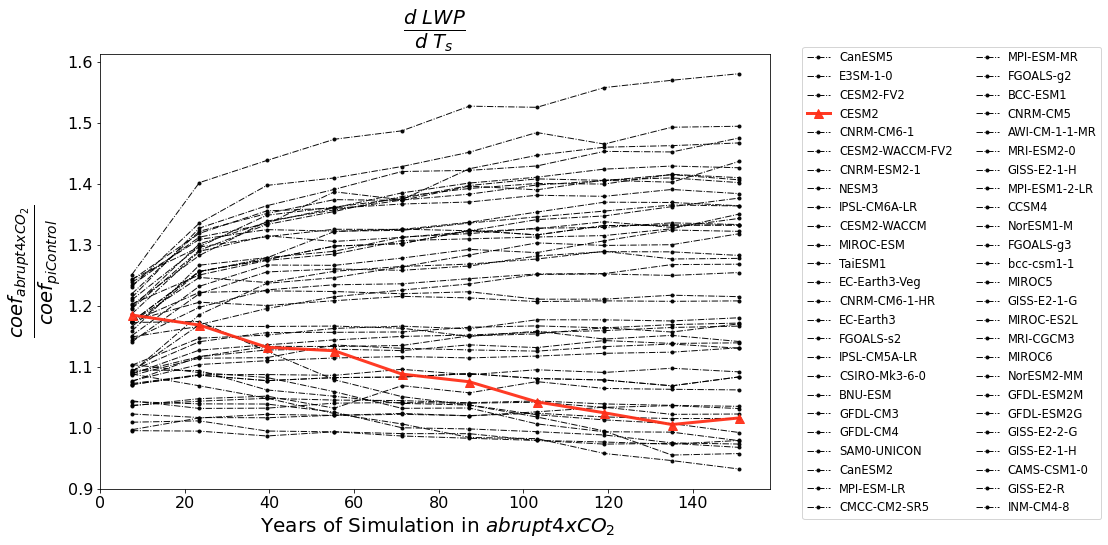

In [67]:
from matplotlib import colors as mcolor
import matplotlib.pylab as plab

# plot settings:
parameters = {'axes.labelsize': 20, 'axes.labelsize': 24, 'legend.fontsize': 11.5,
         'axes.titlesize': 26, 'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)

N = 51
colors = plab.cm.rainbow_r(np.linspace(0., 1., N))
print(colors.shape)

fig2 = plt.figure(figsize = (12, 8))
ax2 = fig2.add_subplot(111)

x = np.linspace(7.5, 151., 10)

ki = 0
kj = 0
    
for j in range(len(deck3_nas)):
    
    if deck3_nas[j] == 'CESM2':  # or deck3_nas[j] == 'CESM2FV2' or deck3_nas[j] == 'CESM2WACCMFV2' or deck3_nas[j] == 'CESM2WACCM' or deck3_nas[j] == 'E3SM10':
        Line_CESM2 = ax2.plot((x), rf_Coef_lwpccfs[j, :, 0], '-', marker = '^', linewidth = 3.0, c = colors[j], alpha = 0.945, markersize = 9, label = deck3[j]['modn'], zorder = 11)
        print(output_Coefs_15yrs[deck3_nas[j]]['abrupt4xCO2'+'_'+str(j)][0])
    else:
        Line_gcm = ax2.plot((x), rf_Coef_lwpccfs[j, :, 0], '-.', marker = 'o', linewidth = 1.0, c = 'k', alpha = 0.945, markersize = 3, label = deck3[j]['modn'], zorder = 10)
    
# plt.legend([Line_CESM2], ['CESM2'])
plt.legend(bbox_to_anchor = (1.040, 0.23, 0.2, 0.8), ncol = 2)

ax2.set_xlabel(r" Years of Simulation in "+r"$abrupt4xCO_{2}$", fontsize = 20)
ax2.set_ylabel(r"$\frac{coef_{abrupt4xCO_{2}}}{coef_{piControl}}$", fontsize = 28)

ax2.set_xticks(ticks = np.arange(0, 150, 20))
ax2.set_title(r"$ \frac{d\ LWP}{d\ T_{s}} $", fontsize = 28)

# plt.savefig(path6+"Timeevolving_dLWP_dTs_June7th.png", bbox_inches = 'tight', dpi = 300)